# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
import yfinance as yf

## Get stock data

In [2]:
ticker = 'SPY'

In [3]:
stock_df = yf.download('SPY', start='2018-01-01')
stock_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,245.828400,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,247.383286,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,248.426010,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,250.081558,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,250.538879,57319200


## Adj close against volume

Let's try and see if adjusted close and volume are correlated (by fitting a regression line). 

In [4]:
x = stock_df['Volume'].values.reshape(-1, 1)
y = stock_df['Adj Close'].values.reshape(-1, 1)

In [5]:
lm = Ridge(alpha=0.001)
lm.fit(x, y)

Ridge(alpha=0.001)

In [6]:
lm.score(x, y)

0.026850071305995482

Not too much relationship, since $R^2$ is quite low. Let's try and plot the result. 

In [7]:
beta_0 = lm.intercept_[0]
beta_1 = lm.coef_[0][0]
assert isinstance(beta_0, float) and isinstance(beta_1, float)

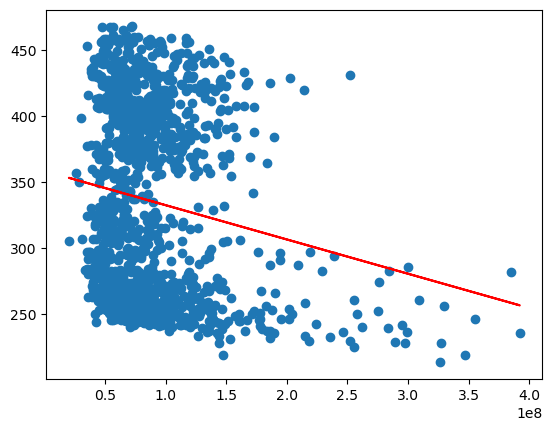

In [8]:
plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1 * x, color='red')
plt.show()

## Change in Adj close against change in volume

In [9]:
x = stock_df['Volume'].diff()[1:].values.reshape(-1, 1)
y = stock_df['Adj Close'].diff()[1:].values.reshape(-1, 1)

In [10]:
lm = Ridge(alpha=0.001)
lm.fit(x, y)

Ridge(alpha=0.001)

In [11]:
lm.score(x, y)

0.10723812163994695

Better $R^2$ but I doubt the predictive power?

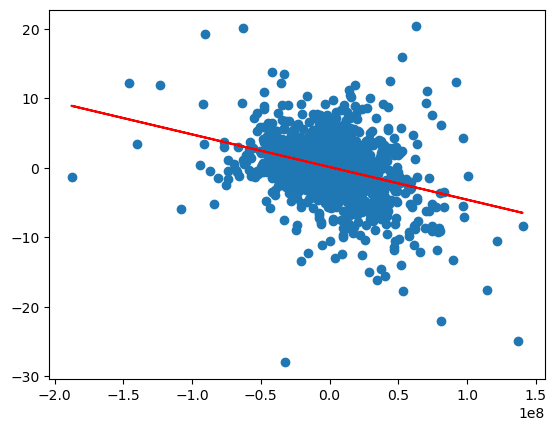

In [12]:
beta_0 = lm.intercept_[0]
beta_1 = lm.coef_[0][0]
assert isinstance(beta_0, float) and isinstance(beta_1, float)

plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1 * x, color='red')
plt.show()

## Change in adj close against change in log volume

In [13]:
x = stock_df['Volume'].diff()[1:].values.reshape(-1, 1)
y = np.log(stock_df['Adj Close']).diff()[1:].values.reshape(-1, 1)

In [14]:
lm = Ridge(alpha=0.001)
lm.fit(x, y)

Ridge(alpha=0.001)

In [15]:
lm.score(x, y)

0.1157883202308656

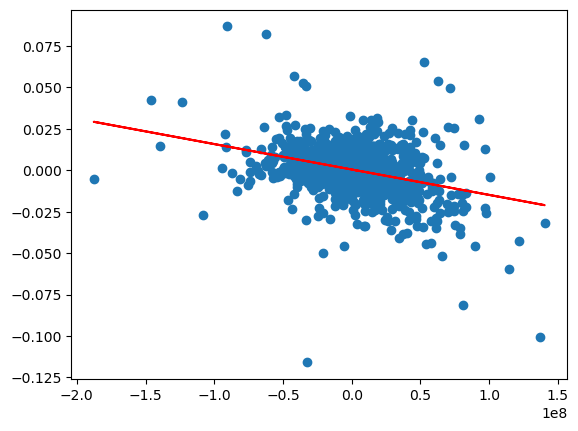

In [16]:
beta_0 = lm.intercept_[0]
beta_1 = lm.coef_[0][0]
assert isinstance(beta_0, float) and isinstance(beta_1, float)

plt.scatter(x, y)
plt.plot(x, beta_0 + beta_1 * x, color='red')
plt.show()